## <span style="color : green"> Multiple Layer Perceptron </span>

# <center> Table of Contents </center>

1. Train a Multiple layer perceptron model for classification and regression  
2. Plot the no of epoochs and error plot
1. Evaluate the model using - 
   1. Classification - Confusion matrix, f1-score, accuracy, precision, recall
   2. Regression - Mean Squared Error, R-Squared Score
1. Optimize the MLP models using Random Search CV and Grid Search CV
1. Train a Support Vector Machine Classifier and Regression 
1. Evaluate the Support Vector Mahine Models

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, learning_curve, \
        RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, \
        mean_squared_error
import tensorflow as tf
from sklearn.svm import SVR, SVR
from scipy.stats import randint
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from warnings import filterwarnings

filterwarnings('ignore')

In [3]:
df = pd.read_csv('../Datasets/Heart1.csv')
df.drop('Oldpeak', axis=1, inplace=True)
df.head()

,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Slope,Ca,Thal
0,145,233,1,2,150,0,3,0,fixed
1,160,286,0,2,108,1,2,3,normal
2,120,229,0,2,129,1,2,2,reversable
3,130,250,0,0,187,0,3,0,normal
4,130,204,0,2,172,0,1,0,normal


In [4]:
df.Chol.fillna(df.Chol.mean(), inplace=True)
df.MaxHR.fillna(df.MaxHR.mean(), inplace=True)

In [5]:
x = df.iloc[:,:-1]

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

encoder = LabelEncoder()
df['Thal'] =  encoder.fit_transform(df['Thal'])

y = df.iloc[:,-1:].values

In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, random_state=0,test_size=0.3, shuffle=True)

## Classification with Multiple Layer Perceptron

In [7]:
model = Sequential()
model.add(Dense(128, activation='relu',input_shape=(8,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1152      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 99        
Total params: 11,587
Trainable params: 11,587
Non-trainable params: 0
_________________________________________________________________


2023-04-26 06:45:40.947762: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-26 06:45:40.949291: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   RestBP   303 non-null    int64
 1   Chol     303 non-null    int64
 2   Fbs      303 non-null    int64
 3   RestECG  303 non-null    int64
 4   MaxHR    303 non-null    int64
 5   ExAng    303 non-null    int64
 6   Slope    303 non-null    int64
 7   Ca       303 non-null    int64
 8   Thal     303 non-null    int64
dtypes: int64(9)
memory usage: 21.4 KB


In [9]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [10]:
history = model.fit(xtrain, ytrain, epochs=100, )

Train on 212 samples
Epoch 1/100
212/212 [==============================] - 1s 5ms/sample - loss: 0.9806 - accuracy: 0.4717
Epoch 2/100
212/212 [==============================] - 0s 129us/sample - loss: 0.8298 - accuracy: 0.6415
Epoch 3/100
212/212 [==============================] - 0s 139us/sample - loss: 0.7834 - accuracy: 0.6698
Epoch 4/100
212/212 [==============================] - 0s 164us/sample - loss: 0.7604 - accuracy: 0.6887
Epoch 5/100
212/212 [==============================] - 0s 141us/sample - loss: 0.7514 - accuracy: 0.6651
Epoch 6/100
212/212 [==============================] - 0s 141us/sample - loss: 0.7381 - accuracy: 0.6840
Epoch 7/100
212/212 [==============================] - 0s 131us/sample - loss: 0.7250 - accuracy: 0.6604
Epoch 8/100
212/212 [==============================] - 0s 136us/sample - loss: 0.7412 - accuracy: 0.6745
Epoch 9/100
212/212 [==============================] - 0s 133us/sample - loss: 0.7468 - accuracy: 0.6698
Epoch 10/100
212/212 [==============

212/212 [==============================] - 0s 141us/sample - loss: 0.2820 - accuracy: 0.8821
Epoch 79/100
212/212 [==============================] - 0s 143us/sample - loss: 0.2682 - accuracy: 0.8868
Epoch 80/100
212/212 [==============================] - 0s 141us/sample - loss: 0.2325 - accuracy: 0.9057
Epoch 81/100
212/212 [==============================] - 0s 161us/sample - loss: 0.2394 - accuracy: 0.9009
Epoch 82/100
212/212 [==============================] - 0s 141us/sample - loss: 0.2561 - accuracy: 0.9104
Epoch 83/100
212/212 [==============================] - 0s 139us/sample - loss: 0.2251 - accuracy: 0.9104
Epoch 84/100
212/212 [==============================] - 0s 135us/sample - loss: 0.2056 - accuracy: 0.9151
Epoch 85/100
212/212 [==============================] - 0s 135us/sample - loss: 0.2012 - accuracy: 0.9245
Epoch 86/100
212/212 [==============================] - 0s 134us/sample - loss: 0.2072 - accuracy: 0.9057
Epoch 87/100
212/212 [==============================] - 0s 

In [11]:
# Evaluating the model 

loss, accuracy = model.evaluate(xtest, ytest, verbose = 0)
print(f'\n\nLoss: {loss}, Accuracy: {accuracy}')



Loss: 3.1764364137754337, Accuracy: 0.5714285969734192


In [12]:
# Weight for every attribute 

print(model.get_weights())

[array([[ 0.018879  , -0.6250494 , -0.10395607, ..., -0.1200972 ,
        -0.75854003,  0.11656034],
       [ 0.25343436,  0.49161604,  0.00328512, ..., -0.2401782 ,
         0.38576013,  0.04889241],
       [ 0.3120219 ,  0.1313451 ,  0.0248012 , ...,  0.3916575 ,
        -0.77829236, -0.12070011],
       ...,
       [ 0.27756166,  0.21717185, -0.02025992, ...,  0.43644664,
         0.03327319,  0.21159846],
       [-0.27288145, -0.58297294,  0.01151642, ..., -0.25484553,
        -0.4734749 ,  0.18913577],
       [-0.20754841,  0.03354729, -0.05454873, ..., -1.2110089 ,
         0.8115104 , -0.23459359]], dtype=float32), array([-0.12594412,  0.35032317, -0.05115532,  0.00052245, -0.30808398,
        0.11918052, -0.11171191, -0.09596429,  0.11813296, -0.19592768,
       -0.05909685, -0.2047824 ,  0.07632688, -0.22426352, -0.19603436,
       -0.0885328 ,  0.02125331,  0.12280915, -0.04400707, -0.09369256,
       -0.05552758, -0.13309848, -0.20450047, -0.24995425, -0.23313075,
       -0.

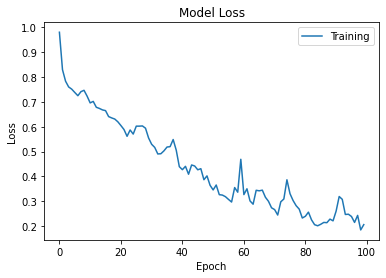

In [13]:
# Loss or Error

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training'])
plt.show()


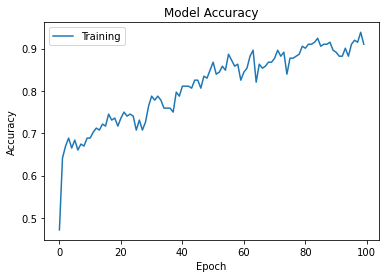

In [14]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training'])
plt.show()

## Classification with Support Vector Machine

In [15]:
from sklearn.svm import SVC

model = SVC()
model.fit(xtrain,ytrain)

SVC()

In [16]:
ypred = model.predict(xtest)

In [17]:
print(f'Accuraacy of the SVM Classifier is {round(accuracy_score(ytest, ypred)*100,2)}')

Accuraacy of the SVM Classifier is 63.74


In [18]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.75      0.72      0.74        58
           2       0.46      0.57      0.51        28

    accuracy                           0.64        91
   macro avg       0.40      0.43      0.41        91
weighted avg       0.62      0.64      0.63        91



In [19]:
print(confusion_matrix(ytest, ypred))

[[ 0  2  3]
 [ 0 42 16]
 [ 0 12 16]]


## Hyper-Tuning using Random Search CV

In [67]:
def create_model(hidden_layers=2, units=32, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(units, input_dim=8, activation=activation))
    for i in range(hidden_layers):
        model.add(Dense(units, activation=activation))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)

In [68]:
param_distributions = {
    'hidden_layers': randint(1, 5),
    'units': randint(16, 64),
    'activation': ['relu', 'softmax'],
    'optimizer': ['adam', 'sgd']
}

search = RandomizedSearchCV(model, \
                            param_distributions=param_distributions, \
                            n_iter=10, cv=3)

In [69]:
search.fit(xtrain, ytrain, epochs=10, )

RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fe72366d550>,
                   param_distributions={'activation': ['relu', 'softmax'],
                                        'hidden_layers': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe72366d190>,
                                        'optimizer': ['adam', 'sgd'],
                                        'units': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe758aa2210>})

In [70]:
print('Best hyperparameters:', search.best_params_,'\n')
print('Best score:', round(search.best_score_*100,2))

Best hyperparameters: {'activation': 'relu', 'hidden_layers': 4, 'optimizer': 'adam', 'units': 55} 

Best score: 64.14


In [71]:
test_score = search.score(xtest, ytest)
print('Test score:', round(test_score*100,2))

Test score: 61.54


In [72]:
best_params = search.best_params_

model = KerasClassifier(build_fn=create_model, verbose=0, **best_params)

model.fit(xtrain, ytrain, epochs=10, )


## Hyper-Tuning using Grid Search CV

In [74]:
def create_model(hidden_layers=2, units=32, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(units, input_dim=8, activation=activation))
    for i in range(hidden_layers):
        model.add(Dense(units, activation=activation))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)

In [78]:
param_grid = {
    'units': [16, 32, 64],
    'activation': ['relu', 'softmax'],
    'optimizer': ['adam', 'sgd']
}

search = GridSearchCV(model, \
                    param_grid=param_grid, \
                    cv=3)

In [79]:
search.fit(xtrain, ytrain, epochs= 10, )

GridSearchCV(cv=3,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fe72601cbd0>,
             param_grid={'activation': ['relu', 'softmax'],
                         'optimizer': ['adam', 'sgd'], 'units': [16, 32, 64]})

In [80]:
print('Best hyperparameters:', search.best_params_,'\n')
print('Best score:', round(search.best_score_*100,2))

Best hyperparameters: {'activation': 'relu', 'optimizer': 'adam', 'units': 64} 

Best score: 64.63


In [81]:
test_score = search.score(xtest, ytest)
print('Test score:', round(test_score*100,2))

Test score: 60.44


In [82]:
best_params = search.best_params_

model = KerasClassifier(build_fn=create_model, verbose=0, **best_params)

model.fit(xtrain, ytrain, epochs=10, )


## Regression with Multiple Layer Perceptron

In [65]:
df = pd.read_csv('../Datasets/Solar.csv')
df.head()

,Latitude,Longitude,Altitude,min Temo,Max Temp,Sunshine Hour,Solar Radiation
0,34.08,74.79,1730,-0.9,4.3,0.450000,1.32
1,34.08,74.79,1730,1.8,8.1,0.542857,2.70
2,34.08,74.79,1730,5.2,12.2,0.528571,3.95
3,34.08,74.79,1730,9.2,18.5,0.650000,5.06
4,34.08,74.79,1730,12.6,22.6,0.692857,5.62


In [66]:
df.Latitude.fillna(df.Latitude.mean(), inplace=True)
df['min Temo'].fillna(df['min Temo'].mean(), inplace=True)

x = df.iloc[:,:-1]
y = df.iloc[:,-1:].values

scalar = MinMaxScaler()
x = scalar.fit_transform(x)

In [71]:
np.shape(xtrain)

(182, 6)

In [67]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, shuffle=True, random_state=0)

In [80]:
model = Sequential()
model.add(Dense(128, activation='relu',input_shape=(6,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 128)               896       
_________________________________________________________________
dense_25 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_26 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 33        
Total params: 11,265
Trainable params: 11,265
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['mean_squared_error'])

In [82]:
history = model.fit(xtrain, ytrain, epochs=100, )

Train on 182 samples
Epoch 1/100
182/182 [==============================] - 1s 3ms/sample - loss: 18.6069 - mean_squared_error: 18.6069
Epoch 2/100
182/182 [==============================] - 0s 121us/sample - loss: 3.3604 - mean_squared_error: 3.3604
Epoch 3/100
182/182 [==============================] - 0s 124us/sample - loss: 2.0352 - mean_squared_error: 2.0352
Epoch 4/100
182/182 [==============================] - 0s 116us/sample - loss: 1.2187 - mean_squared_error: 1.2187
Epoch 5/100
182/182 [==============================] - 0s 112us/sample - loss: 0.9407 - mean_squared_error: 0.9407
Epoch 6/100
182/182 [==============================] - 0s 232us/sample - loss: 0.7869 - mean_squared_error: 0.7869
Epoch 7/100
182/182 [==============================] - 0s 133us/sample - loss: 0.6869 - mean_squared_error: 0.6869
Epoch 8/100
182/182 [==============================] - 0s 126us/sample - loss: 0.6188 - mean_squared_error: 0.6188
Epoch 9/100
182/182 [==============================] - 0s 1

In [88]:
# Evaluating the model 

loss, mse = model.evaluate(xtest, ytest, verbose = 0)
print(f'\n\nLoss: {loss}, Accuracy: {mse}')



Loss: 0.38937118779058044, Accuracy: 0.38937121629714966


In [84]:
# Weight for every attribute 

print(model.get_weights())

[array([[ 2.92811524e-02,  2.64259218e-03, -8.92652199e-02,
         5.28422669e-02, -2.38479912e-01, -1.30696803e-01,
        -2.19416112e-01, -1.38516560e-01, -1.40825570e-01,
         3.85763794e-02,  1.56191885e-02, -2.73742005e-02,
        -2.68015172e-02, -2.15248629e-01, -5.60384281e-02,
        -6.78850412e-02, -1.63721874e-01,  1.49110407e-01,
        -3.38856429e-02, -3.06624532e-01,  8.92071426e-03,
         8.24095383e-02, -6.81377947e-02, -8.33252966e-02,
        -8.66812989e-02,  8.20030347e-02,  9.99397039e-02,
        -2.32921422e-01,  1.33238211e-01,  5.59305958e-02,
        -5.35943061e-02,  1.19879499e-01,  9.51106548e-02,
         2.08821278e-02, -3.77640761e-02, -6.58302754e-02,
        -2.53193051e-01,  8.51182044e-02,  6.16950542e-02,
         8.16186816e-02,  1.22321077e-01, -1.40797496e-01,
        -2.23491743e-01,  4.08746209e-03,  9.28239971e-02,
        -1.29531831e-01, -1.55238405e-01,  1.72084048e-01,
         1.02598689e-01, -5.90535849e-02, -2.97018290e-

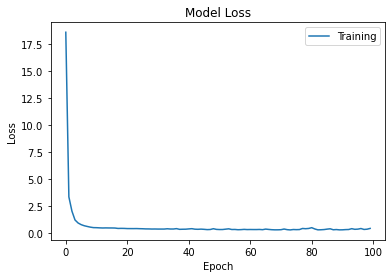

In [85]:
# Loss or Error

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training'])
plt.show()


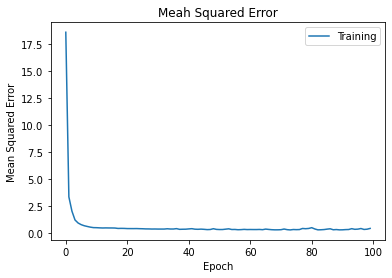

In [89]:
plt.plot(history.history['mean_squared_error'])
plt.title('Meah Squared Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend(['Training'])
plt.show()

## Regression with  Support Vector Machine

In [93]:
model = SVR()
model.fit(xtrain,ytrain)

SVR()

In [94]:
ypred = model.predict(xtest)

In [100]:
ypred = model.predict(xtest)
print(f'Mean Squared Error - {round(mean_squared_error(ytest, ypred),2)}')

Mean Squared Error - 0.37


In [101]:
print(f'Root Mean Squared Error - {round(np.sqrt(mean_squared_error(ytest, ypred)),2)}')

Root Mean Squared Error - 0.61


## Hyper-tuning with Random Search CV 

## Hyper-tuning with Grid Search CV 